In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
%matplotlib notebook

In [2]:
def koval1(log_mean, log_sd, mean_nor, sd, sizen):
    """
    This function uses the definition of both the mean and st of the lognormal
    distribution.
    mean_nor = mean of normal distribution
    sd = standard deviation of normal pdf. Let be sd < mean_nor/3
    """

    # Obtain the mean and std in terms of the normal pdf
    normal_std = np.sqrt(np.log(1 + (log_sd/log_mean)**2))
    normal_mean = np.log(log_mean) - normal_std**2 / 2
    
    # Create DataFrame and permeability and porosity columns
    x = pd.DataFrame(np.random.lognormal(normal_mean, normal_std, size=sizen), columns=['permeability'])
    x['porosity'] = np.random.normal(mean_nor, sd, size=sizen)
    
    # Obtain the total sum of both permeability and porosity
    sumk = x['permeability'].sum()
    sumphi = x['porosity'].sum()
    x['interst vel'] = x['permeability'] / x['porosity'] # Interstitial velocity
    
    # Sort the interstitial velocity in descending order
    x.sort_values(by=['interst vel'], ascending=False, inplace=True)
    
    k1 = np.cumsum(pd.DataFrame(x['permeability']))
    phi1 = np.cumsum(pd.DataFrame(x['porosity']))
    x['(1-F)/F'] = (sumk / k1) - 1
    x['(1-C)/C'] = (sumphi / phi1) - 1
    x.replace(x[x < 1e-5], 0, inplace=True)
    x.drop(['interst vel'], axis=1, inplace=True)
    
    x['series phi'] = np.cumsum(1 / phi1) # sum of (1/phi1) + (1/(phi1 + phi2)) + ...
    x['series k'] = np.cumsum(1 / k1) # sum of (1/k1) + (1/(k1 + k2)) + ...
    
    # Linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(
    x['(1-C)/C'], x['(1-F)/F'])

    return x, r_value ** 2, p_value

In [3]:
def koval2(mean_exp, mean_nor, sd, sizen):
    """
    This function uses the quantile function of the exponential distribution
    to compute the random variable of the x axis.
    mean_exp = mean of exponential distribution
    mean_nor = mean of normal distribution
    sd = standard deviation of normal pdf. Let be sd < mean_nor/3
    """
    
    # Create DataFrame and permeability and porosity columns
    x = pd.DataFrame(np.random.exponential(mean_exp, size=sizen), columns=['permeability'])
    x['porosity'] = np.random.normal(mean_nor, sd, size=sizen)
    
    # Obtain the total sum of both permeability and porosity
    sumk = x['permeability'].sum()
    sumphi = x['porosity'].sum()
    x['interst vel'] = x['permeability'] / x['porosity'] # Interstitial velocity
    
    # Sort the interstitial velocity in descending order
    x.sort_values(by=['interst vel'], ascending=False, inplace=True)
    
    k1 = np.cumsum(pd.DataFrame(x['permeability']))
    phi1 = np.cumsum(pd.DataFrame(x['porosity']))
    x['(1-F)/F'] = (sumk / k1) - 1
    x['(1-C)/C'] = (sumphi / phi1) - 1
    x.replace(x[x < 1e-5], 0, inplace=True)
    x.drop(['interst vel'], axis=1, inplace=True)
    
    x['series phi'] = np.cumsum(1 / phi1) # sum of (1/phi1) + (1/(phi1 + phi2)) + ...
    x['series k'] = np.cumsum(1 / k1) # sum of (1/k1) + (1/(k1 + k2)) + ...
    
    # Linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(
    x['(1-C)/C'], x['(1-F)/F'])

    return x, r_value ** 2, p_value

In [4]:
def koval3(log_mean, log_sd, mean, beta, sizen):
    """
    This function uses the beta pdf for permeability
    mean_exp = mean of exponential distribution
    mean_nor = mean of normal distribution
    sd = standard deviation of normal pdf. Let be sd < mean_nor/3
    """
    
    # Create DataFrame and permeability and porosity columns
    alpha = - (mean * beta) / (mean - 1)
    normal_std = np.sqrt(np.log(1 + (log_sd/log_mean)**2))
    normal_mean = np.log(log_mean) - normal_std**2 / 2
    
    x = pd.DataFrame(np.random.beta(alpha, beta, size=sizen), columns=['porosity'])
    x['permeability'] = np.random.lognormal(normal_mean, normal_std, size=sizen)

    
    # Obtain the total sum of both permeability and porosity
    sumk = x['permeability'].sum()
    sumphi = x['porosity'].sum()
    x['interst vel'] = x['permeability'] / x['porosity'] # Interstitial velocity
    
    # Sort the interstitial velocity in descending order
    x.sort_values(by=['interst vel'], ascending=False, inplace=True)
    
    k1 = np.cumsum(pd.DataFrame(x['permeability']))
    phi1 = np.cumsum(pd.DataFrame(x['porosity']))
    x['(1-F)/F'] = (sumk / k1) - 1
    x['(1-C)/C'] = (sumphi / phi1) - 1
    x.where(x > 0, 0, inplace=True)
    x.drop(['interst vel'], axis=1, inplace=True)
    
    x['series phi'] = np.cumsum(1 / phi1) # sum of (1/phi1) + (1/(phi1 + phi2)) + ...
    x['series k'] = np.cumsum(1 / k1) # sum of (1/k1) + (1/(k1 + k2)) + ...
    
    # Linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(
    x['(1-C)/C'], x['(1-F)/F'])

    return x, r_value ** 2, p_value

In [4]:
def koval4(mean_k, scale_k, mean_phi, scale_phi, sizen):
    """
    Porosity is weibull
    Permeability is gamma
    """
    
    # Create DataFrame and permeability and porosity columns
    shape_k = mean_k / scale_k
    
    x = pd.DataFrame(np.random.logistic(mean_phi, scale_phi, size=sizen), columns=['porosity'])
    x['permeability'] = np.random.gamma(shape_k, scale_k, size=sizen)

    
    # Obtain the total sum of both permeability and porosity
    sumk = x['permeability'].sum()
    sumphi = x['porosity'].sum()
    x['interst vel'] = x['permeability'] / x['porosity'] # Interstitial velocity
    
    # Sort the interstitial velocity in descending order
    x.sort_values(by=['interst vel'], ascending=False, inplace=True)
    
    k1 = np.cumsum(pd.DataFrame(x['permeability']))
    phi1 = np.cumsum(pd.DataFrame(x['porosity']))
    x['(1-F)/F'] = (sumk / k1) - 1
    x['(1-C)/C'] = (sumphi / phi1) - 1
    x.where(x > 0, 0, inplace=True)
    x.drop(['interst vel'], axis=1, inplace=True)
    
    x['series phi'] = np.cumsum(1 / phi1) # sum of (1/phi1) + (1/(phi1 + phi2)) + ...
    x['series k'] = np.cumsum(1 / k1) # sum of (1/k1) + (1/(k1 + k2)) + ...
    
    # Linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(
    x['(1-C)/C'], x['(1-F)/F'])

    return x, r_value ** 2, p_value

## Permeability is lognormal, Porosity is normal

In [27]:
kv1 = koval1(95.65, 90, 0.25, 0.03, 10000)

In [9]:
plt.style.use('seaborn-whitegrid')

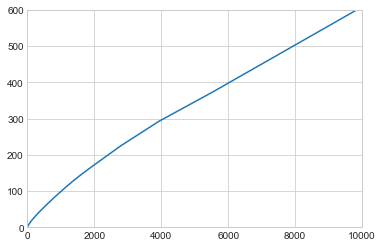

In [22]:
fig, ax = plt.subplots(1)

ax.plot(kv1['(1-C)/C'], kv1['(1-F)/F'])
ax.set(xlim=(0, 1e4), ylim=(0, 600));

## Permeability is exponential, Porosity is normal

In [49]:
np.random.seed(12345)
kv2, r2, p2 = koval2(95.65, 0.25, 0.03, 1000000)

In [50]:
r2, p2

(0.9899091652099733, 0.0)

In [53]:
np.random.seed(12345)
kv2, r2, p2 = koval2(95.65, 0.25, 0.03, 100)

In [54]:
r2, p2

(0.9884480598119004, 9.501302156504885e-97)

## Permeability is lognormal, Porosity is beta

In [119]:
np.random.seed(12345)
kv3, r3, p3 = koval3(95.65, 90, 0.25, 50, 25)

In [120]:
r3, p3

(0.9993081904695766, 7.522124254107052e-38)

In [121]:
kv3.describe()

,porosity,permeability,(1-F)/F,(1-C)/C,series phi,series k
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.265870,104.741860,0.864594,3.507473,13.704862,0.012308
std,0.060630,95.509999,1.960195,7.940869,2.897260,0.003891
min,0.166566,19.965567,0.000000,0.000000,6.003638,0.004074
25%,0.226109,44.508543,0.076479,0.344015,12.269824,0.009648
50%,0.247576,71.322928,0.251531,0.999134,14.498630,0.012835
75%,0.302611,131.224412,0.681987,2.560734,15.929838,0.015446
max,0.437490,391.978946,9.667569,38.904610,16.953701,0.017802


## Permeability is gamma, Porosity is logistic

In [21]:
np.random.seed(12345)
kv4, r4, p4 = koval4(95.65, 0.5, 0.25, 0.005, 4)

In [22]:
kv4

,porosity,permeability,(1-F)/F,(1-C)/C,series phi,series k
3,0.243210,104.357145,3.028586,3.090342,4.111676,0.009582
1,0.246148,105.438341,1.003912,1.032893,6.155172,0.014349
0,0.262904,109.720190,0.315778,0.322428,7.484497,0.017479
2,0.242550,100.896097,0.000000,0.000000,8.489713,0.019857


In [26]:
kv4.iloc[-1, 4] * kv4['porosity'].sum()

8.445662637470162

In [27]:
r4, p4

(0.9999907755599872, 4.612230642742086e-06)

(array([  1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,
          1.,   0.,   1.,   0.,   1.,   0.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   2.,   1.,   2.,   1.,   2.,   3.,   2.,   3.,   2.,
          4.,   3.,   4.,   4.,   4.,   5.,   5.,   6.,   6.,   7.,   8.,
          8.,   9.,  10.,  11.,  11.,  13.,  14.,  15.,  17.,  18.,  20.,
         21.,  24.,  25.,  28.,  31.,  33.,  35.,  40.,  42.,  47.,  50.,
         55.,  60.,  65.,  70.,  77.,  84.,  90.,  99., 106., 116., 126.,
        137., 147., 161., 174., 188., 204., 221., 239., 258., 280., 302.,
        327., 353., 381., 412., 443., 479., 515., 555., 598., 641., 689.,
        739.]),
 array([0.0087747 , 0.00957289, 0.01037107, 0.01116925, 0.01196743,
        0.01276562, 0.0135638 , 0.01436198, 0.01516016, 0.01595835,
        0.01675653, 0.01755471, 0.0183529 , 0.01915108, 0.01994926,
        0.02074744, 0.02154563, 0.02234381, 0.02314199, 0.02394017,
        0.02473836, 0.02553654, 0.02633472, 0.

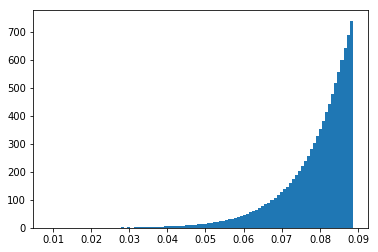

In [179]:
titi = plt.figure()
plt.hist(kv4['series k'], bins=100)

In [33]:
np.zeros((5, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [34]:
KLR = pd.DataFrame(np.zeros((10, 4)),
                      columns=['Slope', 'Intercept', 'P value', 'R^2']) # initializing DataFrame of results

In [35]:
KLR

,Slope,Intercept,P value,R^2
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0


In [39]:
for itera in range(10):
    print(itera)

0
1
2
3
4
5
6
7
8
9


In [42]:
KLR.iloc[0, :] = 1, 2, 3, 4

In [43]:
KLR

,Slope,Intercept,P value,R^2
0,1.0,2.0,3.0,4.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0
